In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset

In [0]:
CONFIRMED_DATA_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv"
confirmed_data = pd.read_csv(CONFIRMED_DATA_URL)

RECOVERED_DATA_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Recovered_archived_0325.csv"
recovered_data = pd.read_csv(RECOVERED_DATA_URL)

DEATH_DATA_URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv"
death_data = pd.read_csv(DEATH_DATA_URL)


In [0]:
confirmed_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


## Hubei Province, China

In [0]:
hubei = confirmed_data.iloc[154]
hubei_confirmed = pd.DataFrame(hubei[4:])
hubei_confirmed = hubei_confirmed.rename(columns={154:'Hubei'})
max = {'Hubei':[200000]}

max_df = pd.DataFrame(max)
hubei_confirmed = pd.concat([hubei_confirmed, max_df])
hubei_confirmed

,Hubei
1/22/20,444
1/23/20,444
1/24/20,549
1/25/20,761
1/26/20,1058
...,...
3/20/20,67800
3/21/20,67800
3/22/20,67800
3/23/20,67800


In [0]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
hubei_confirmed = scaler.fit_transform(hubei_confirmed)
hubei_confirmed = hubei_confirmed[:62]
hubei_confirmed

array([[0.        ],
       [0.        ],
       [0.00052617],
       [0.00158853],
       [0.00307683],
       [0.00490589],
       [0.0155846 ],
       [0.0155846 ],
       [0.02234461],
       [0.02686965],
       [0.03361964],
       [0.0537844 ],
       [0.06553549],
       [0.0813506 ],
       [0.09631883],
       [0.10858105],
       [0.12281766],
       [0.13357654],
       [0.1462597 ],
       [0.15676803],
       [0.16497625],
       [0.16497625],
       [0.23934134],
       [0.27041031],
       [0.27964581],
       [0.28933232],
       [0.29838742],
       [0.30687125],
       [0.30862014],
       [0.31067971],
       [0.31178216],
       [0.31890798],
       [0.31890798],
       [0.31992523],
       [0.32242579],
       [0.32443525],
       [0.3264848 ],
       [0.32807833],
       [0.33019804],
       [0.33305438],
       [0.33403656],
       [0.33460783],
       [0.33518411],
       [0.3358556 ],
       [0.336487  ],
       [0.33685782],
       [0.33706328],
       [0.337

## New York State, US

In [0]:
# United States - New York
newyork = confirmed_data.iloc[99]
newyork_confirmed = pd.DataFrame(newyork[4:])
newyork_confirmed = newyork_confirmed.rename(columns={99:'New York'})
ny_max = {'New York':[200000]}

max_df = pd.DataFrame(ny_max)
newyork_confirmed = pd.concat([newyork_confirmed, max_df])
row_names = newyork_confirmed.index.values
row_names_df = pd.DataFrame(row_names[:62])
# newyork_confirmed_mod = newyork_confirmed.copy()
# for i in range(newyork_confirmed.shape[0]):
#   newyork_confirmed_mod.rename(index={row_names_df[i][0]: i})
# newyork_confirmed_mod

In [0]:
# Normalize the dataset
newyork_confirmed = scaler.fit_transform(newyork_confirmed)
newyork_confirmed = newyork_confirmed[len(newyork_confirmed) - 15:len(newyork_confirmed) - 1]
newyork_confirmed

array([[0.000865],
       [0.0011  ],
       [0.00164 ],
       [0.002105],
       [0.002625],
       [0.00366 ],
       [0.004835],
       [0.00853 ],
       [0.012475],
       [0.026825],
       [0.04155 ],
       [0.05855 ],
       [0.078965],
       [0.078965]])

## South Korea

In [0]:
# South Korea
korea = confirmed_data.iloc[156]
korea_confirmed = pd.DataFrame(korea[4:])
korea_confirmed = korea_confirmed.rename(columns={156:'South Korea'})

In [0]:
# Normalize the dataset
korea_confirmed = scaler.fit_transform(korea_confirmed)
korea_confirmed

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.12410072e-04],
       [1.12410072e-04],
       [2.24820144e-04],
       [3.37230216e-04],
       [3.37230216e-04],
       [3.37230216e-04],
       [3.37230216e-04],
       [1.12410072e-03],
       [1.23651079e-03],
       [1.57374101e-03],
       [1.57374101e-03],
       [1.68615108e-03],
       [2.02338129e-03],
       [2.47302158e-03],
       [2.58543165e-03],
       [2.58543165e-03],
       [2.69784173e-03],
       [2.92266187e-03],
       [3.03507194e-03],
       [3.03507194e-03],
       [3.03507194e-03],
       [3.03507194e-03],
       [3.03507194e-03],
       [3.14748201e-03],
       [3.25989209e-03],
       [3.37230216e-03],
       [3.37230216e-03],
       [1.15782374e-02],
       [2.28192446e-02],
       [4.85611511e-02],
       [6.75584532e-02],
       [9.35251799e-02],
       [1.09712230e-01],
       [1.41636691e-01],
       [1.98403777e-01],
       [2.62589928e-01],
       [3.53979317e-01],
       [4.19851619e-01],


## Spain

In [0]:
# Spain 
spain = confirmed_data.iloc[18]
spain_confirmed = pd.DataFrame(spain[4:])
spain_confirmed = spain_confirmed.rename(columns={18:'Spain'})

In [0]:
# Normalize the dataset
spain_confirmed = scaler.fit_transform(spain_confirmed)
spain_confirmed

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [3.47608454e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [6.95216908e-05],
       [2.08565072e-04],
       [4.51890990e-04],
       [5.21412681e-04],
       [1.11234705e-03],
       [1.56423804e-03],
       [2.91991101e-03],


## Italy

In [0]:
# Italy 
italy = confirmed_data.iloc[16]
italy_confirmed = pd.DataFrame(italy[4:])
italy_confirmed = italy_confirmed.rename(columns={16:'Italy'})

In [0]:
# Normalize the dataset
italy_confirmed = scaler.fit_transform(italy_confirmed)
italy_confirmed

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.38192025e-05],
       [3.38192025e-05],
       [3.38192025e-05],
       [3.38192025e-05],
       [3.38192025e-05],
       [3.38192025e-05],
       [3.38192025e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [5.07288038e-05],
       [3.38192025e-04],
       [1.04839528e-03],
       [2.62098820e-03],
       [3.87229869e-03],
       [5.44489161e-03],
       [7.66004938e-03],
       [1.10757888e-02],
       [1.50157259e-02],
       [1.90740302e-02],
       [2.86448646e-02],


## France

In [0]:
# France
france = confirmed_data.iloc[157]
france_confirmed = pd.DataFrame(france[4:])
france_confirmed = france_confirmed.rename(columns={157:'France'})

In [0]:
# Normalize the dataset
france_confirmed = scaler.fit_transform(france_confirmed)
france_confirmed

array([[0.00000000e+00],
       [0.00000000e+00],
       [1.24859533e-04],
       [1.87289300e-04],
       [1.87289300e-04],
       [1.87289300e-04],
       [2.49719066e-04],
       [3.12148833e-04],
       [3.12148833e-04],
       [3.12148833e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [3.74578599e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [6.86727432e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [7.49157198e-04],
       [8.74016731e-04],
       [1.12373580e-03],
       [2.37233113e-03],
       [3.55849669e-03],
       [6.24297665e-03],
       [8.11586965e-03],


## China (Excluding Hubei Province)

In [0]:
# China Rest
china_rest1 = confirmed_data.iloc[158:165]
china_rest2 = confirmed_data.iloc[166:170]
china_rest3 = confirmed_data.iloc[174:186]
china_rest4 = confirmed_data.iloc[187:191]
china_rest5 = confirmed_data.iloc[193:195]
china_rest6 = confirmed_data.iloc[202]
china_rest_confirmed6 = pd.DataFrame(china_rest6[4:])
china_comb = pd.concat([china_rest1,china_rest2, china_rest3, china_rest4, china_rest5])
china_comb_dropped = china_comb.drop(['Province/State','Country/Region','Lat','Long'], axis=1)
china_comb_trans = china_comb_dropped.T
china_rest_confirmed_concat = pd.concat([china_comb_trans, china_rest_confirmed6], axis=1)
sums = china_rest_confirmed_concat.sum(axis = 1, skipna = True) 
sumspd = pd.DataFrame(sums)
china_rest_confirmed = sumspd.rename(columns={0:'China (Excluding Hubei)'})

In [0]:
# Normalize the dataset
china_rest_confirmed = scaler.fit_transform(china_rest_confirmed)
china_rest_confirmed

array([[0.        ],
       [0.00640923],
       [0.01882711],
       [0.03885595],
       [0.06561448],
       [0.09830155],
       [0.1355552 ],
       [0.17665438],
       [0.23033168],
       [0.28593174],
       [0.33920846],
       [0.39296587],
       [0.44824547],
       [0.51161673],
       [0.5667361 ],
       [0.61865086],
       [0.66864285],
       [0.70934145],
       [0.74587406],
       [0.77784009],
       [0.80700208],
       [0.83448165],
       [0.85563211],
       [0.87453934],
       [0.8900016 ],
       [0.90225925],
       [0.91099183],
       [0.91684025],
       [0.92116648],
       [0.92469156],
       [0.94496074],
       [0.94688351],
       [0.94856593],
       [0.95000801],
       [0.95104951],
       [0.95185066],
       [0.95265182],
       [0.95353309],
       [0.95425413],
       [0.9546547 ],
       [0.95529563],
       [0.95617689],
       [0.95665759],
       [0.95809966],
       [0.95978209],
       [0.95994232],
       [0.96074347],
       [0.960

## Overall US

In [0]:
## United States - exclude New York

us_part1 = confirmed_data.iloc[100:133]
us_part1_state = us_part1['Province/State']
us_part1 = us_part1.drop(['Province/State', 'Country/Region','Lat','Long'],  axis=1).T
us_part2 = confirmed_data.iloc[137:154]
us_part2_state = us_part2['Province/State']
us_part2 = us_part2.drop(['Province/State', 'Country/Region','Lat','Long'],  axis=1).T

washington_dc = confirmed_data.iloc[279]
washington_dc_confirmed = pd.DataFrame(washington_dc[4:])
washington_dc_confirmed = washington_dc_confirmed.rename(columns={279:'Washington D.C.'})
washington = confirmed_data.iloc[98]
washington_confirmed = pd.DataFrame(washington[4:])
washington_confirmed = washington_confirmed.rename(columns= {98:'Washington'})
us_part1 = us_part1.rename(columns= us_part1_state)
us_part2 = us_part2.rename(columns= us_part2_state)

us_con = pd.concat([us_part1, us_part2, washington_dc_confirmed, washington_confirmed], axis = 1, sort=False)
us_sum = us_con.sum(axis = 1, skipna=True)
us_confirmed = pd.DataFrame(us_sum)
us_confirmed = us_confirmed.rename(columns={0: 'United States'})
us_confirmed

,United States
1/22/20,0.0
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
3/19/20,8214.0
3/20/20,10676.0
3/21/20,13609.0
3/22/20,17288.0


In [0]:
# Normalize the dataset
us_confirmed = scaler.fit_transform(us_confirmed)
us_confirmed

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.00208237],
       [0.00208237],
       [0.00242943],
       [0.00242943],
       [0.00254512],
       [0.00254512],
       [0.00254512],
       [0.00260296],
       [0.00260296],
       [0.00260296],
       [0.00260296],
       [0.00260296],
       [0.00381768],
       [0.00393336],
       [0.003

## Data Cleaning (Hubei Province)

In [0]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [0]:
# Reshape data into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(hubei_confirmed, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [0]:
trainX

array([[[0.        ]],

       [[0.        ]],

       [[0.00052617]],

       [[0.00158853]],

       [[0.00307683]],

       [[0.00490589]],

       [[0.0155846 ]],

       [[0.0155846 ]],

       [[0.02234461]],

       [[0.02686965]],

       [[0.03361964]],

       [[0.0537844 ]],

       [[0.06553549]],

       [[0.0813506 ]],

       [[0.09631883]],

       [[0.10858105]],

       [[0.12281766]],

       [[0.13357654]],

       [[0.1462597 ]],

       [[0.15676803]],

       [[0.16497625]],

       [[0.16497625]],

       [[0.23934134]],

       [[0.27041031]],

       [[0.27964581]],

       [[0.28933232]],

       [[0.29838742]],

       [[0.30687125]],

       [[0.30862014]],

       [[0.31067971]],

       [[0.31178216]],

       [[0.31890798]],

       [[0.31890798]],

       [[0.31992523]],

       [[0.32242579]],

       [[0.32443525]],

       [[0.3264848 ]],

       [[0.32807833]],

       [[0.33019804]],

       [[0.33305438]],

       [[0.33403656]],

       [[0.33460

## Data Cleaning (New York State, US)

In [0]:
testX, testY = create_dataset(newyork_confirmed, look_back)

In [0]:
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Create and Fit LSTM Network (Hubei Province, China)

In [0]:
# create and fit the LSTM network
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, look_back)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1)

Epoch 1/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0493
Epoch 2/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0250
Epoch 3/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0148
Epoch 4/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 5/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 6/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 7/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 8/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 9/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 10/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 11/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 12/100
60/60 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 13/100
60/60 [=================

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [0]:
# calculate root mean squared errors
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2189.57 RMSE
Test Score: 2131.04 RMSE


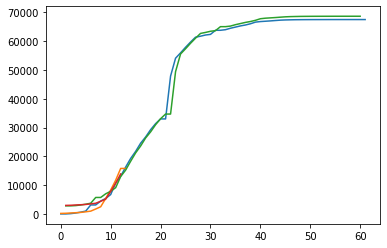

In [0]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(hubei_confirmed)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(newyork_confirmed)
testPredictPlot[:, :] = np.nan
testPredictPlot[look_back:len(testPredict)+look_back, :] = testPredict
# plot baseline and predictions
plt.plot(figsize=(12, 8))
plt.plot(scaler.inverse_transform(hubei_confirmed), label='Hubei Data')
plt.plot(scaler.inverse_transform(newyork_confirmed), label='New York Data')
plt.plot(trainPredictPlot, label='Hubei Predictions')
plt.plot(testPredictPlot, label='New York Precdictions')


## Adding Forecasting

In [0]:
pred_list = []

batch = newyork_confirmed[-1:].reshape((1, 1, look_back))

for i in range(1):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
newyork_confirmed = pd.DataFrame(newyork_confirmed)
newyork_confirmed.insert(0, )

,0
0,0.000865
1,0.001100
2,0.001640
3,0.002105
4,0.002625
5,0.003660
6,0.004835
7,0.008530
8,0.012475
9,0.026825


In [0]:

add_dates = [newyork_confirmed.index[-1] + DateOffset(days=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([newyork_confirmed,df_predict], axis=1)

df_proj.tail(12)

NameError: ignored